In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.time import Time

from sklearn.preprocessing import MinMaxScaler

In [29]:
red = 'VIRGO-RGB/VIRGO-SPM-RED-L2-MISSIONLONG.fits'
green = 'VIRGO-RGB/VIRGO-SPM-GREEN-L2-MISSIONLONG.fits'
blue = 'VIRGO-RGB/VIRGO-SPM-BLUE-L2-MISSIONLONG.fits'

In [71]:
r = fits.open(red)
g = fits.open(green)
b = fits.open(blue)

In [72]:
r.info()
g.info()
b.info()

Filename: VIRGO-RGB/VIRGO-SPM-RED-L2-MISSIONLONG.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (2, 14342400)   float64   
Filename: VIRGO-RGB/VIRGO-SPM-GREEN-L2-MISSIONLONG.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (2, 14342400)   float64   
Filename: VIRGO-RGB/VIRGO-SPM-BLUE-L2-MISSIONLONG.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (2, 14342400)   float64   


In [73]:
r[0].header

SIMPLE  =                    T / Written by IDL:  Wed May 24 12:34:16 2023      
BITPIX  =                  -64 / Real*8 (double precision)                      
NAXIS   =                    2 /                                                
NAXIS1  =                    2 /                                                
NAXIS2  =             14342400 /                                                
DATE    = '2023-05-24'         /                                                
ORIGIN  = 'IAC/VIRGO Data Center (VDC)' /                                       
TELESCOP= 'SOHO    '           /                                                
INSTRUME= 'VIRGO   '           /                                                
DETECTOR= 'SPM     '           /                                                
BUNIT   = 'ppm     '           / Parts per million                              
CHANNEL = 'RED : Wavelength=860nm, Width=5nm ' /                                
DATE-OBS= '1996-01-23T00:00:

In [74]:
g[0].header

SIMPLE  =                    T / Written by IDL:  Wed May 24 12:34:42 2023      
BITPIX  =                  -64 / Real*8 (double precision)                      
NAXIS   =                    2 /                                                
NAXIS1  =                    2 /                                                
NAXIS2  =             14342400 /                                                
DATE    = '2023-05-24'         /                                                
ORIGIN  = 'IAC/VIRGO Data Center (VDC)' /                                       
TELESCOP= 'SOHO    '           /                                                
INSTRUME= 'VIRGO   '           /                                                
DETECTOR= 'SPM     '           /                                                
BUNIT   = 'ppm     '           / Parts per million                              
CHANNEL = 'GREEN : Wavelength=500nm, Width=5nm' /                               
DATE-OBS= '1996-01-23T00:00:

In [75]:
b[0].header

SIMPLE  =                    T / Written by IDL:  Wed May 24 12:35:10 2023      
BITPIX  =                  -64 / Real*8 (double precision)                      
NAXIS   =                    2 /                                                
NAXIS1  =                    2 /                                                
NAXIS2  =             14342400 /                                                
DATE    = '2023-05-24'         /                                                
ORIGIN  = 'IAC/VIRGO Data Center (VDC)' /                                       
TELESCOP= 'SOHO    '           /                                                
INSTRUME= 'VIRGO   '           /                                                
DETECTOR= 'SPM     '           /                                                
BUNIT   = 'ppm     '           / Parts per million                              
CHANNEL = 'BLUE : Wavelenght=402nm, Widht=5nm' /                                
DATE-OBS= '1996-01-23T00:00:

In [76]:
r_data = r[0].data
g_data = g[0].data
b_data = b[0].data

r.close()
g.close()
b.close()

In [77]:
# Using np.float32 to avoid Big-endian to Little-endian conversion error
red_df = pd.DataFrame(r_data.astype(np.float32, copy=True), columns=['Time', 'Red Signal'])
green_df = pd.DataFrame(g_data.astype(np.float32, copy=True), columns=['Time', 'Green Signal'])
blue_df = pd.DataFrame(b_data.astype(np.float32, copy=True), columns=['Time', 'Blue Signal'])

In [78]:
red_df.head()

,Time,Red Signal
0,4.460000,NaN
1,64.459999,NaN
2,124.459999,NaN
3,184.460007,6.905411
4,244.460007,-1.083392


In [79]:
reference_time = "1996-01-23T00:00:04.46"

In [80]:
red_df['Datetime'] = pd.to_datetime(reference_time) + pd.to_timedelta(red_df['Time'], unit='s')
green_df['Datetime'] = pd.to_datetime(reference_time) + pd.to_timedelta(green_df['Time'], unit='s')
blue_df['Datetime'] = pd.to_datetime(reference_time) + pd.to_timedelta(blue_df['Time'], unit='s')

In [81]:
red_df.head()

,Time,Red Signal,Datetime
0,4.460000,NaN,1996-01-23 00:00:08.920000038
1,64.459999,NaN,1996-01-23 00:01:08.919999084
2,124.459999,NaN,1996-01-23 00:02:08.919999084
3,184.460007,6.905411,1996-01-23 00:03:08.920006714
4,244.460007,-1.083392,1996-01-23 00:04:08.920006714


In [82]:
red_df = red_df.drop(columns=['Time'], axis=1)
green_df = green_df.drop(columns=['Time'], axis=1)
blue_df = blue_df.drop(columns=['Time'], axis=1)

In [83]:
red_df.head()

,Red Signal,Datetime
0,NaN,1996-01-23 00:00:08.920000038
1,NaN,1996-01-23 00:01:08.919999084
2,NaN,1996-01-23 00:02:08.919999084
3,6.905411,1996-01-23 00:03:08.920006714
4,-1.083392,1996-01-23 00:04:08.920006714


In [84]:
red_df = red_df.set_index('Datetime')
green_df = green_df.set_index('Datetime')
blue_df = blue_df.set_index('Datetime')

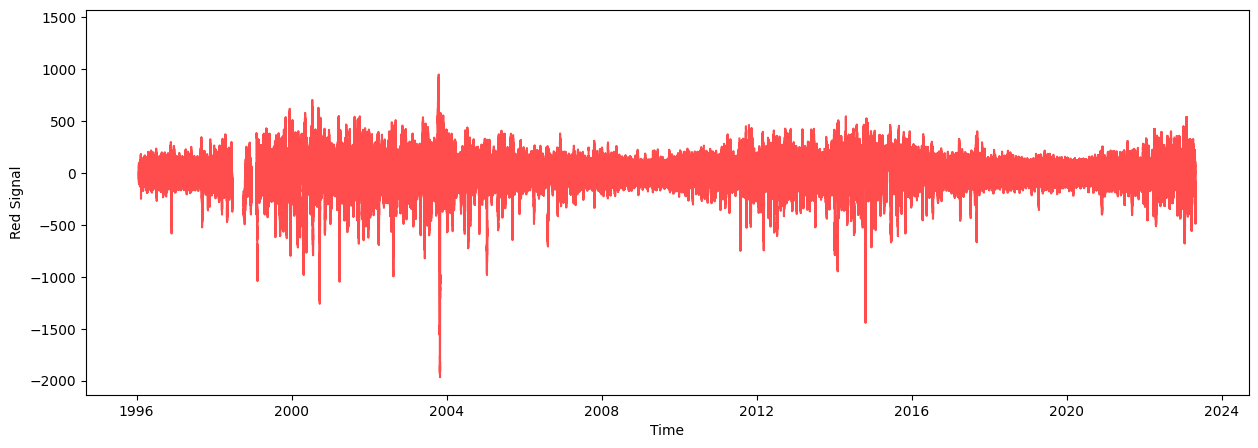

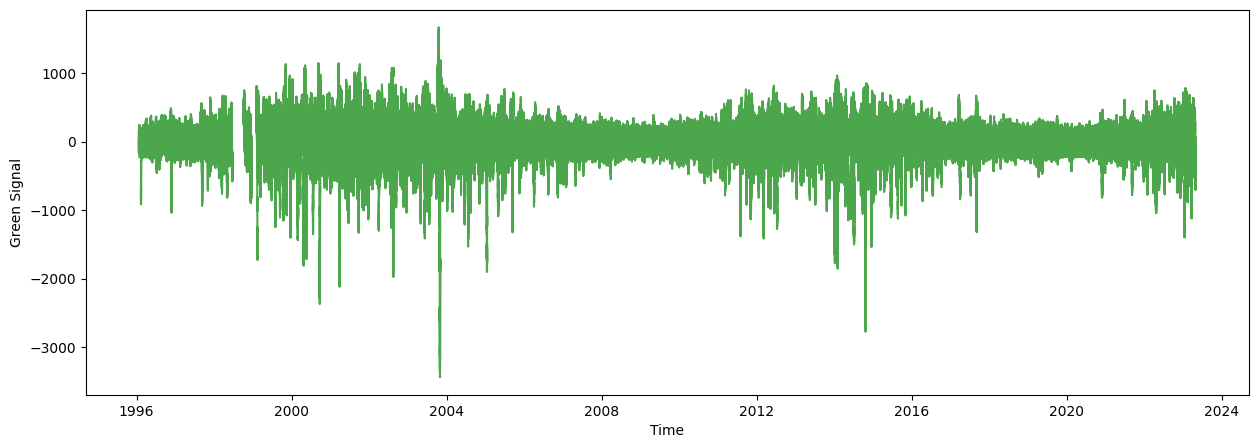

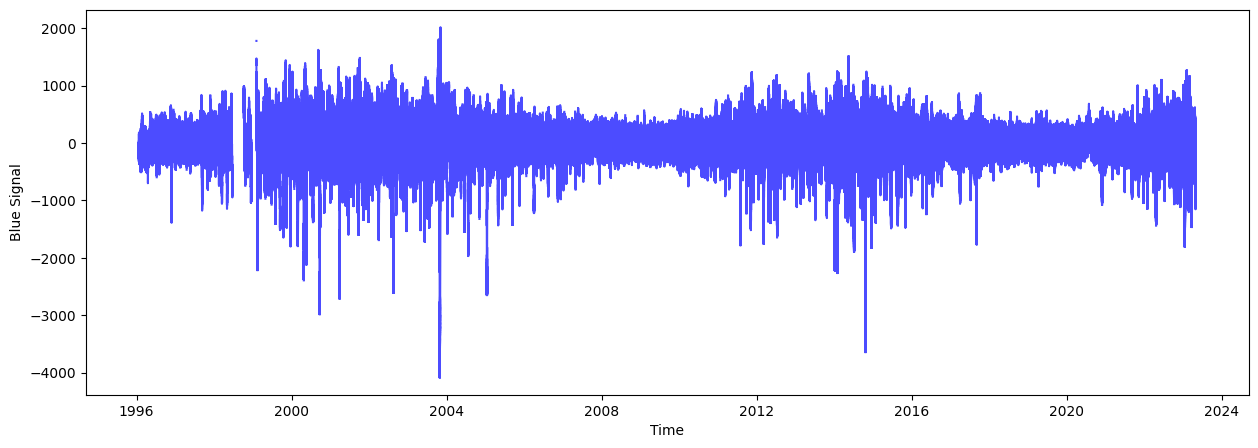

In [86]:
plt.figure(figsize=(15, 5))
plt.plot(red_df.index, red_df['Red Signal'], 'red', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Red Signal')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(green_df.index, green_df['Green Signal'], 'green', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Green Signal')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(blue_df.index, blue_df['Blue Signal'], 'blue', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Blue Signal')
plt.show()

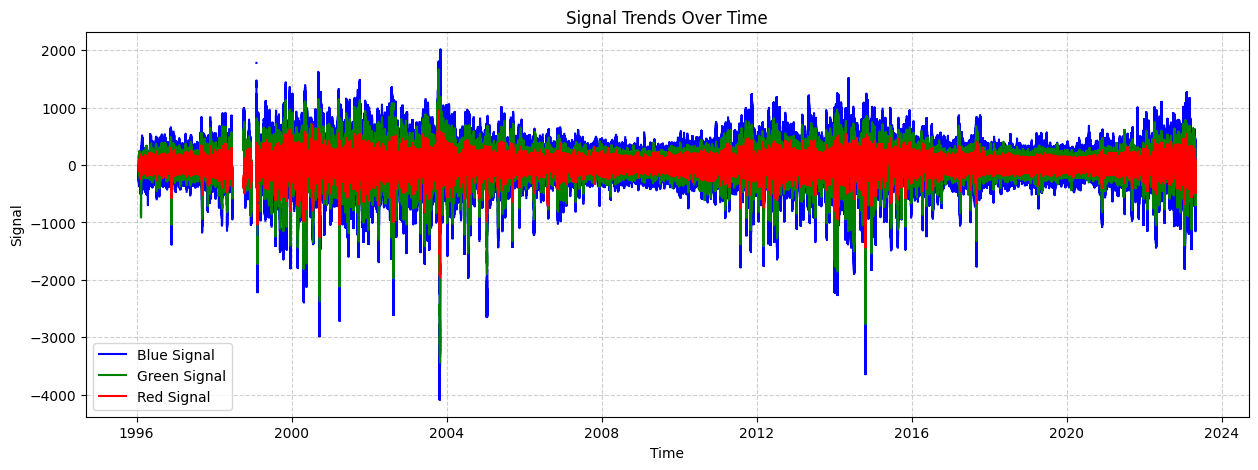

In [91]:
plt.figure(figsize=(15, 5))
plt.plot(blue_df.index, blue_df['Blue Signal'], color='blue', label='Blue Signal')
plt.plot(green_df.index, green_df['Green Signal'], color='green', label='Green Signal')
plt.plot(red_df.index, red_df['Red Signal'], color='red', label='Red Signal')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Signal Trends Over Time')
plt.legend(loc="lower left")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [92]:
red_df['Red Signal'] = red_df['Red Signal'].abs()
green_df['Green Signal'] = green_df['Green Signal'].abs()
blue_df['Blue Signal'] = blue_df['Blue Signal'].abs()

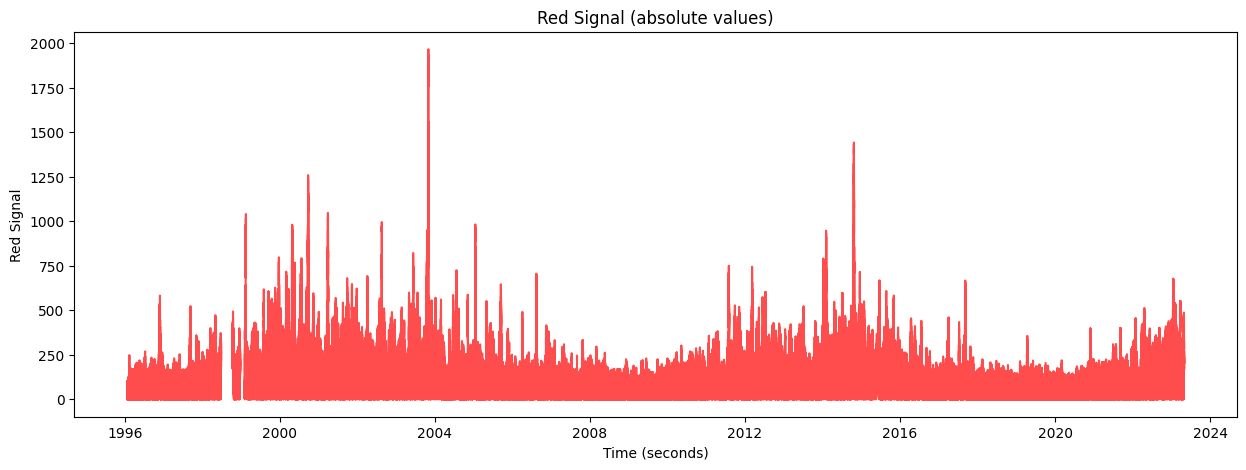

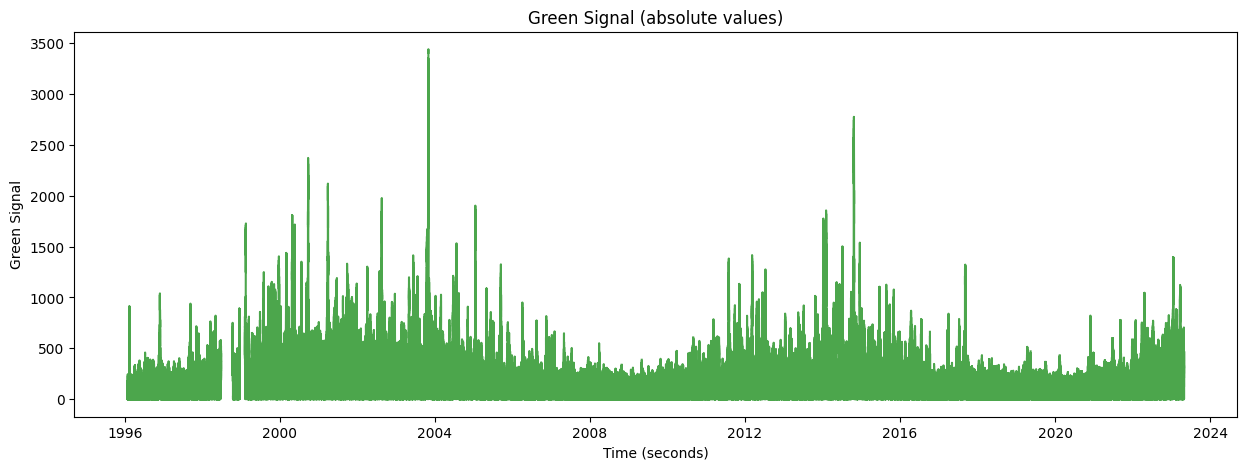

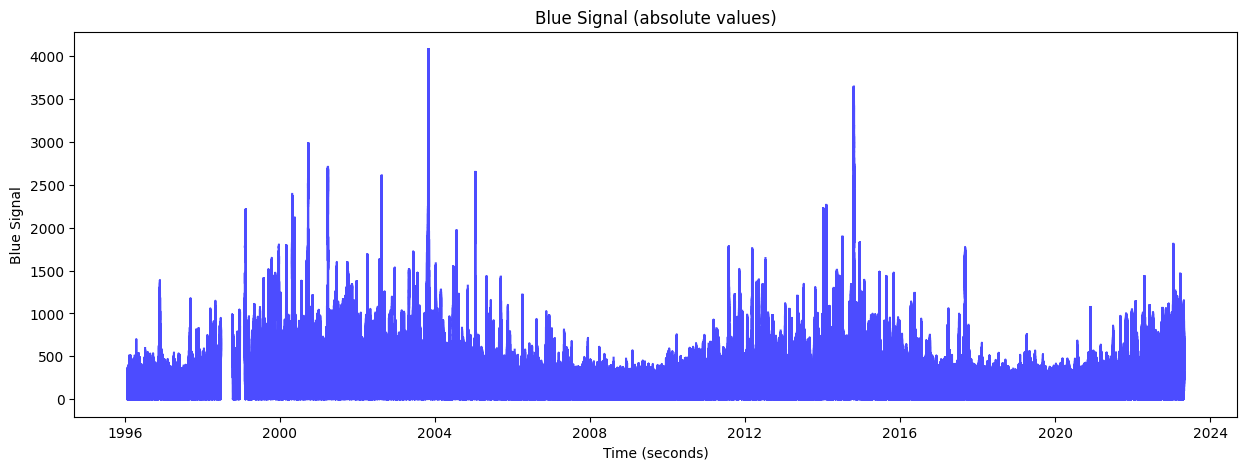

In [93]:
plt.figure(figsize=(15, 5))
plt.plot(red_df.index, red_df['Red Signal'], 'red', alpha=0.7)
plt.title('Red Signal (absolute values)')
plt.xlabel('Time (seconds)')
plt.ylabel('Red Signal')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(green_df.index, green_df['Green Signal'], 'green', alpha=0.7)
plt.title('Green Signal (absolute values)')
plt.xlabel('Time (seconds)')
plt.ylabel('Green Signal')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(blue_df.index, blue_df['Blue Signal'], 'blue', alpha=0.7)
plt.title('Blue Signal (absolute values)')
plt.xlabel('Time (seconds)')
plt.ylabel('Blue Signal')
plt.show()

In [94]:
red_monthly = red_df.resample('MS').mean()
green_monthly = green_df.resample('MS').mean()
blue_monthly = blue_df.resample('MS').mean()

In [95]:
red_monthly.head()

,Red Signal
Datetime,
1996-01-01,23.719715
1996-02-01,31.692816
1996-03-01,36.177341
1996-04-01,54.357136
1996-05-01,51.487976


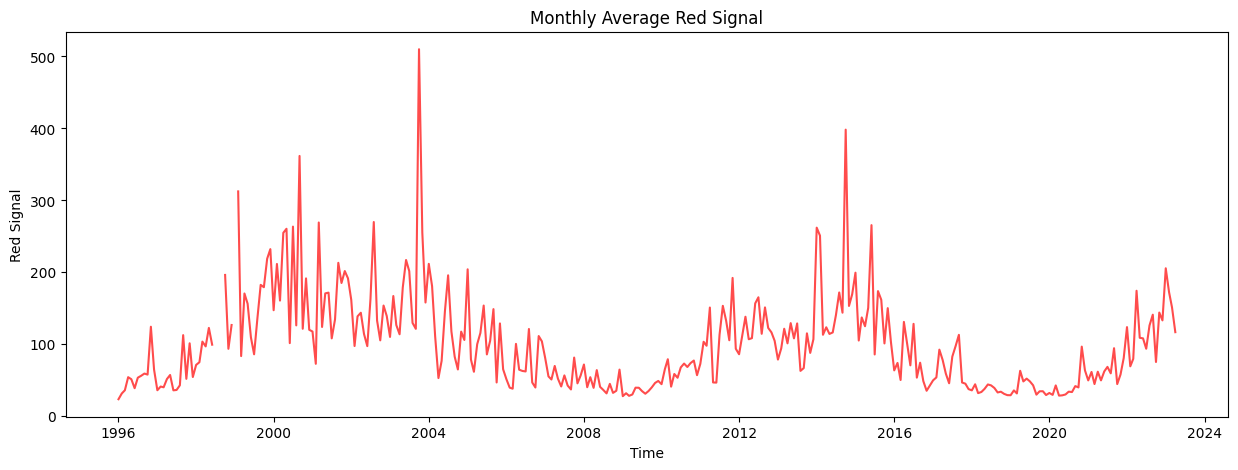

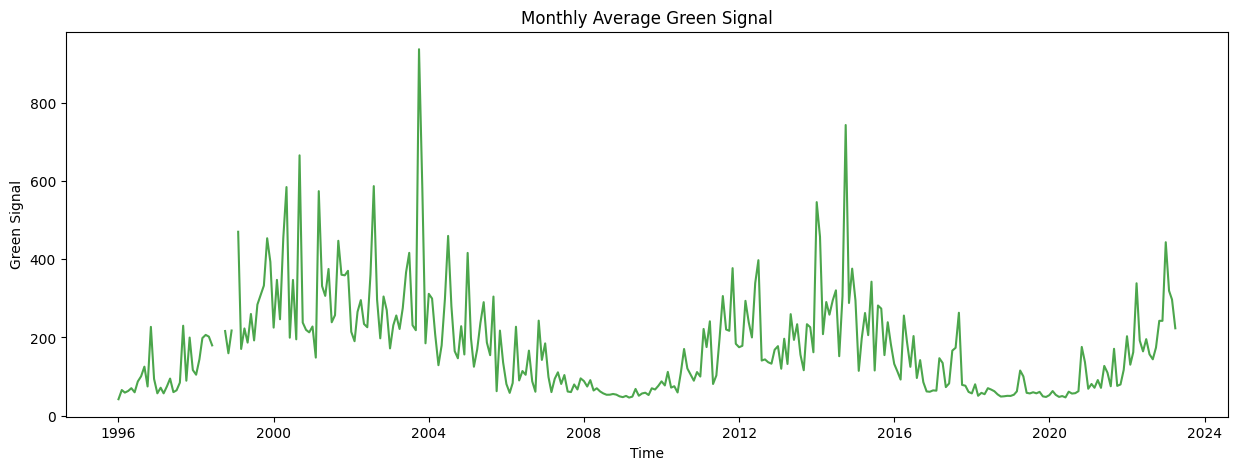

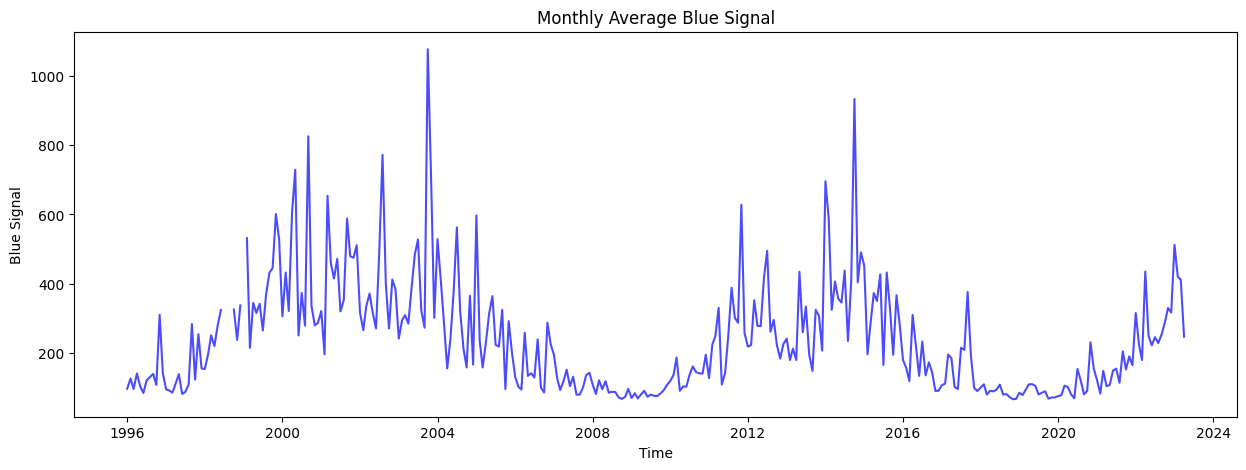

In [96]:
plt.figure(figsize=(15, 5))
plt.plot(red_monthly.index, red_monthly['Red Signal'], 'red', alpha=0.7)
plt.title('Monthly Average Red Signal')
plt.xlabel('Time')
plt.ylabel('Red Signal')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(green_monthly.index, green_monthly['Green Signal'], 'green', alpha=0.7)
plt.title('Monthly Average Green Signal')
plt.xlabel('Time')
plt.ylabel('Green Signal')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(blue_monthly.index, blue_monthly['Blue Signal'], 'blue', alpha=0.7)
plt.title('Monthly Average Blue Signal')
plt.xlabel('Time')
plt.ylabel('Blue Signal')
plt.show()

In [97]:
def apply_13month_smooth(series):
    smoothed = pd.Series(index=series.index, dtype=float)
    smoothed[:] = np.nan  # Initialize with NaN
    
    for i in range(6, len(series) - 6):
        window = series.iloc[i-6:i+7].values
        weights = np.ones(13)
        weights[0] = 0.5
        weights[-1] = 0.5
        smoothed.iloc[i] = np.sum(window * weights) / 12  # Fixed normalization
    
    return smoothed

In [98]:
# Create a DataFrame for the 13-month smoothed data
red_smoothed = pd.DataFrame(index=red_monthly.index)
red_smoothed['Red Signal'] = apply_13month_smooth(red_monthly['Red Signal'])
red_smoothed = red_smoothed.dropna()

green_smoothed = pd.DataFrame(index=green_monthly.index)
green_smoothed['Green Signal'] = apply_13month_smooth(green_monthly['Green Signal'])
green_smoothed = green_smoothed.dropna()

blue_smoothed = pd.DataFrame(index=blue_monthly.index)
blue_smoothed['Blue Signal'] = apply_13month_smooth(blue_monthly['Blue Signal'])
blue_smoothed = blue_smoothed.dropna()

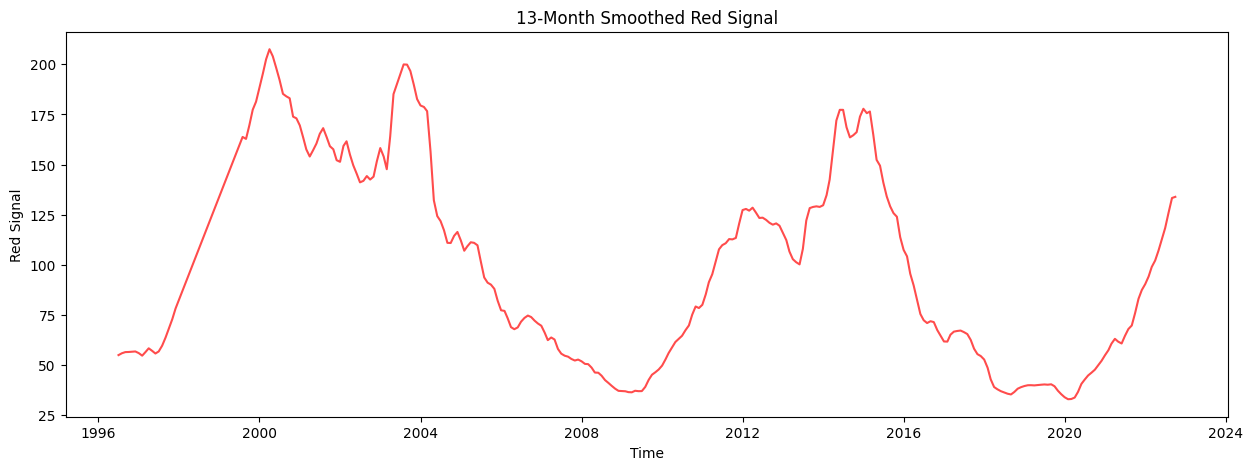

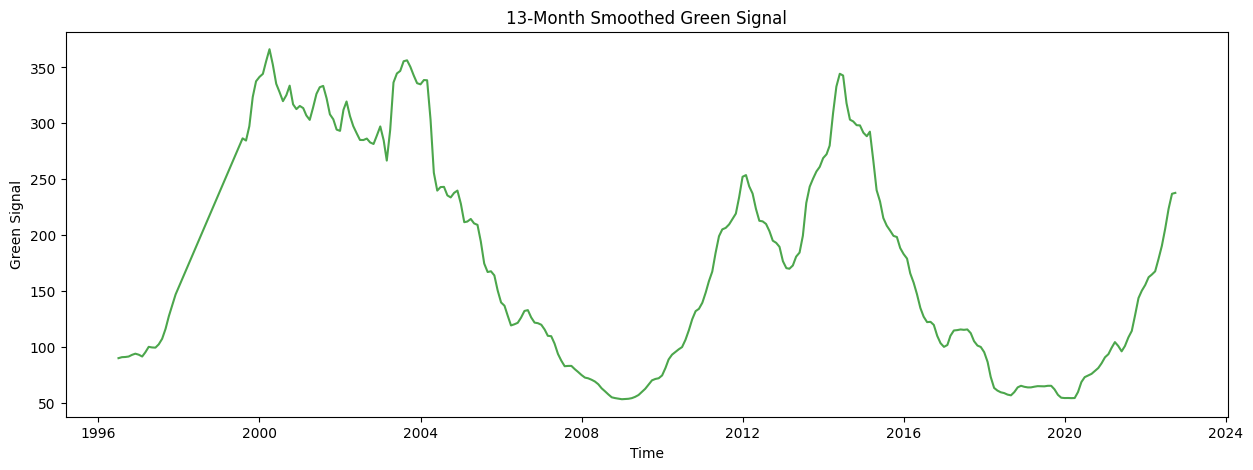

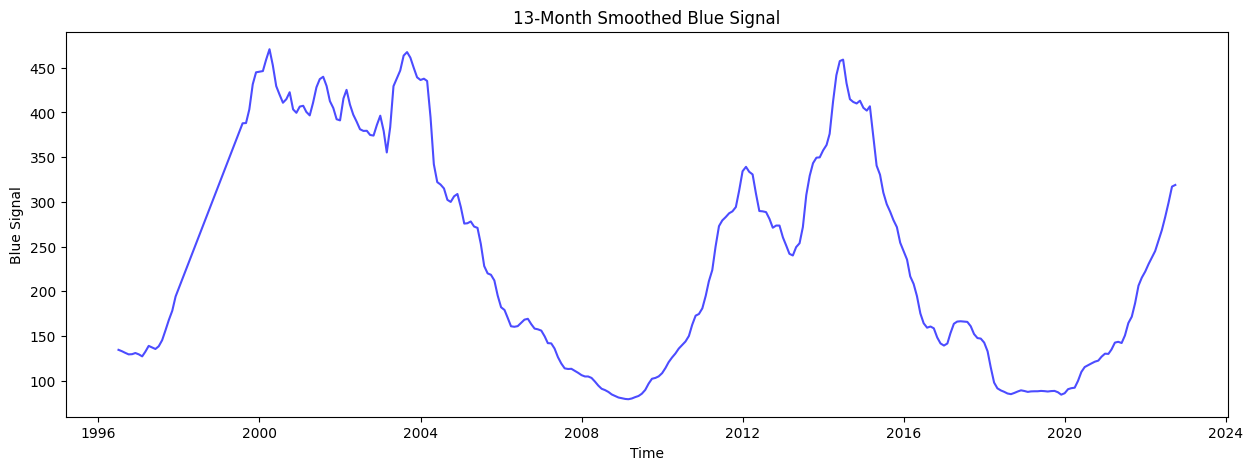

In [99]:
plt.figure(figsize=(15, 5))
plt.plot(red_smoothed.index, red_smoothed['Red Signal'], 'red', alpha=0.7)
plt.title('13-Month Smoothed Red Signal')
plt.xlabel('Time')
plt.ylabel('Red Signal')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(green_smoothed.index, green_smoothed['Green Signal'], 'green', alpha=0.7)
plt.title('13-Month Smoothed Green Signal')
plt.xlabel('Time')
plt.ylabel('Green Signal')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(blue_smoothed.index, blue_smoothed['Blue Signal'], 'blue', alpha=0.7)
plt.title('13-Month Smoothed Blue Signal')
plt.xlabel('Time')
plt.ylabel('Blue Signal')
plt.show()

In [102]:
ssn = pd.read_csv('exported_data/smoothed_sunspot_data.csv')
ssn['Datetime'] = pd.to_datetime(ssn[['Year', 'Month']].assign(DAY=1))
ssn = ssn.set_index('Datetime')
ssn = ssn.drop(columns=['Year', 'Month'], axis=1)

tsi = pd.read_csv('exported_data/tsi_13_month_smoothed.csv')
tsi['Datetime'] = pd.to_datetime(tsi[['Year', 'Month']].assign(DAY=1))
tsi = tsi.set_index('Datetime')
tsi = tsi.drop(columns=['Year', 'Month'], axis=1)

In [109]:
# Combine the dataframes based on the index
combined = pd.concat([red_smoothed, green_smoothed, blue_smoothed, ssn, tsi], axis=1, join='inner')
combined.head()

,Red Signal,Green Signal,Blue Signal,Smoothed_SSN,TSI_W_m2
Datetime,,,,,
1996-07-01,54.933872,89.825498,134.465284,11.266434,1362.934825
1996-08-01,55.855025,90.700372,132.937319,11.362937,1362.938270
1996-09-01,56.428205,90.867081,131.047325,11.550350,1362.945038
1996-10-01,56.489989,91.277671,129.391150,11.946154,1362.955704
1996-11-01,56.626587,92.790516,129.594219,12.623776,1362.965331


In [110]:
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(combined), columns=combined.columns, index=combined.index)
scaled.head()

,Red Signal,Green Signal,Blue Signal,Smoothed_SSN,TSI_W_m2
Datetime,,,,,
1996-07-01,0.126072,0.117333,0.141108,0.051940,0.038197
1996-08-01,0.131347,0.120126,0.137205,0.052482,0.041094
1996-09-01,0.134630,0.120658,0.132377,0.053536,0.046784
1996-10-01,0.134983,0.121969,0.128147,0.055762,0.055754
1996-11-01,0.135766,0.126797,0.128665,0.059572,0.063849


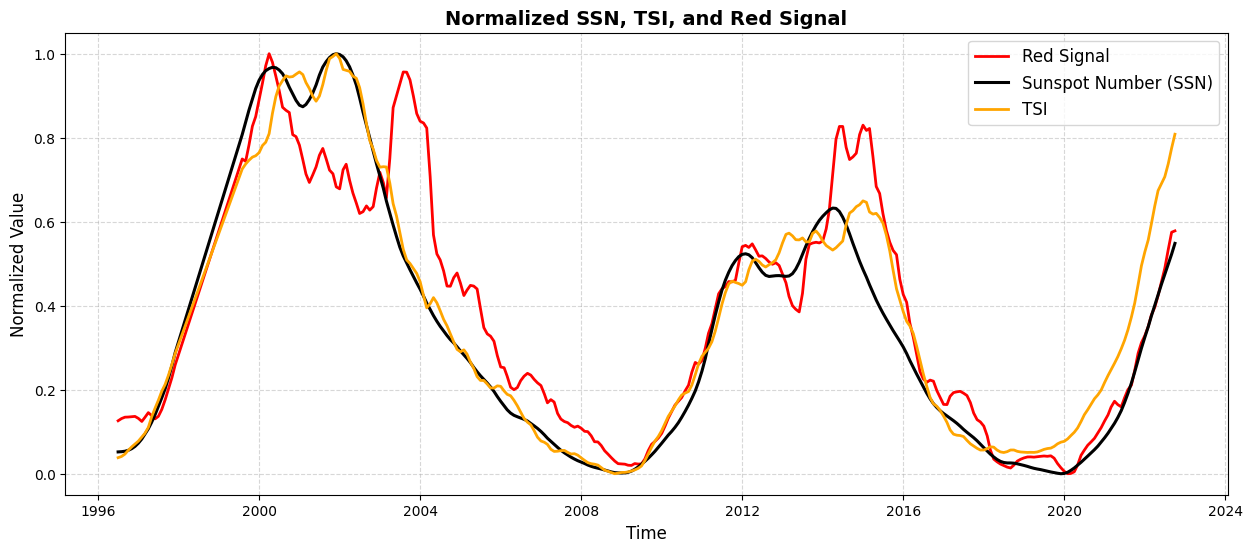

In [127]:

plt.figure(figsize=(15, 6))
plt.plot(scaled.index, scaled['Red Signal'], color='red', linewidth=2, label='Red Signal')
plt.plot(scaled.index, scaled['Smoothed_SSN'], color='black', linewidth=2.2, label='Sunspot Number (SSN)')
plt.plot(scaled.index, scaled['TSI_W_m2'], color='orange', linewidth=2, label='TSI')

plt.title('Normalized SSN, TSI, and Red Signal', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best', fontsize=12)
plt.show()

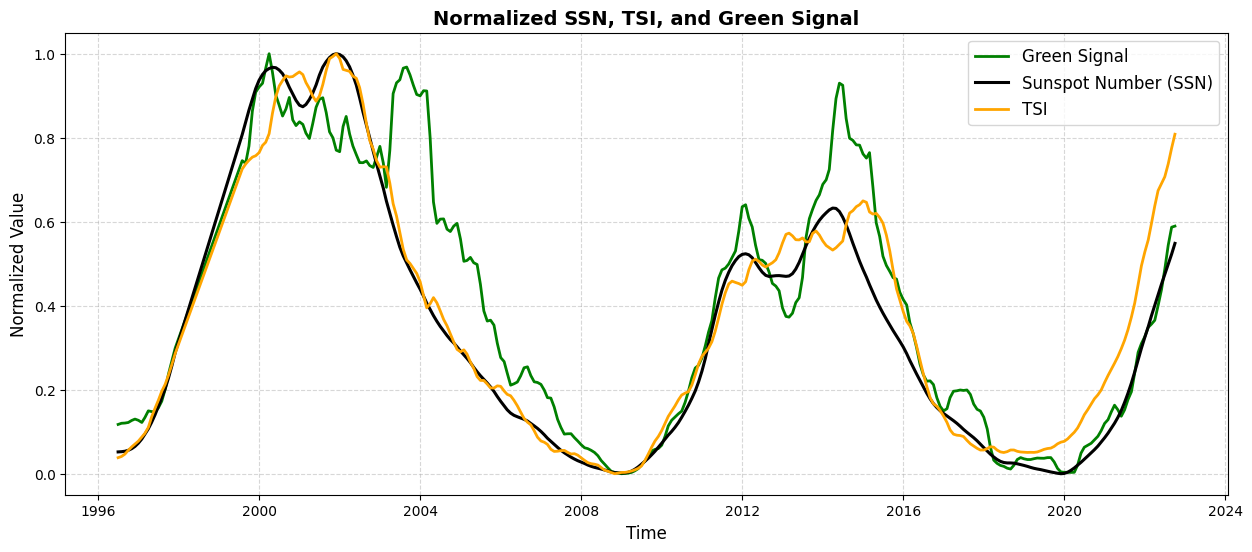

In [128]:
plt.figure(figsize=(15, 6))
plt.plot(scaled.index, scaled['Green Signal'], color='green', linewidth=2, label='Green Signal')
plt.plot(scaled.index, scaled['Smoothed_SSN'], color='black', linewidth=2.2, label='Sunspot Number (SSN)')
plt.plot(scaled.index, scaled['TSI_W_m2'], color='orange', linewidth=2, label='TSI')

plt.title('Normalized SSN, TSI, and Green Signal', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best', fontsize=12)
plt.show()

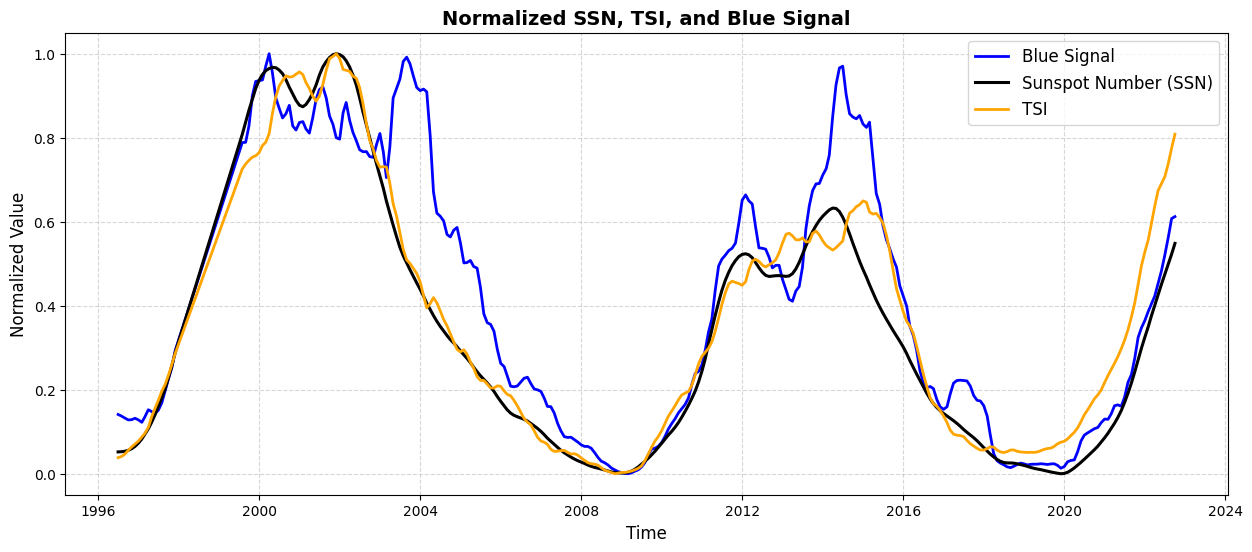

In [129]:
plt.figure(figsize=(15, 6))
plt.plot(scaled.index, scaled['Blue Signal'], color='blue', linewidth=2, label='Blue Signal')
plt.plot(scaled.index, scaled['Smoothed_SSN'], color='black', linewidth=2.2, label='Sunspot Number (SSN)')
plt.plot(scaled.index, scaled['TSI_W_m2'], color='orange', linewidth=2, label='TSI')

plt.title('Normalized SSN, TSI, and Blue Signal', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best', fontsize=12)
plt.show()